In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data sets/Payload_trucks_final.csv')

In [3]:
df.head()

,MACH_SER_NO,OCUR_TS Date,OCUR_TS Time,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,LD_TRAV_DSTNC,LD_PASS_CT,FUEL_USED_IN_CYC,SHFT_CT,Total_distance,Miles,Gear_shift_Miles
0,Truck 1,22-Jul-16,05.44.52.000000000 AM,349.7,193,454,711,3.6,648,610,2.8,5,77.600942,79,6.4,3.976774,19.865346
1,Truck 1,22-Jul-16,06.30.20.000000000 AM,336.5,323,99,177,0.6,56,1225,6.8,6,177.914355,73,7.4,4.598145,15.875966
2,Truck 1,22-Jul-16,07.02.59.000000000 AM,356.3,321,864,867,5.7,61,857,4.6,4,138.167531,100,10.3,6.400121,15.624704
3,Truck 1,22-Jul-16,07.54.33.000000000 AM,343.1,361,594,667,4.6,63,871,4.6,4,140.060237,99,9.2,5.716613,17.317946
4,Truck 1,22-Jul-16,08.38.55.000000000 AM,379.3,218,689,894,6.4,3725,1130,4.4,5,219.080709,103,10.8,6.710807,15.348378


In [4]:
df.shape

(14830, 17)

In [5]:
df.dtypes

MACH_SER_NO          object
OCUR_TS Date         object
OCUR_TS Time         object
PAYLD_WT            float64
LD_TM                 int64
EMTY_STOP_TM          int64
EMTY_TRAV_TM          int64
EMTY_TRAV_DSTNC     float64
LD_STOP_TM            int64
LD_TRAV_TM            int64
LD_TRAV_DSTNC       float64
LD_PASS_CT            int64
FUEL_USED_IN_CYC    float64
SHFT_CT               int64
Total_distance      float64
Miles               float64
Gear_shift_Miles    float64
dtype: object

In [6]:
df.isna().sum()

MACH_SER_NO         0
OCUR_TS Date        0
OCUR_TS Time        0
PAYLD_WT            0
LD_TM               0
EMTY_STOP_TM        0
EMTY_TRAV_TM        0
EMTY_TRAV_DSTNC     0
LD_STOP_TM          0
LD_TRAV_TM          0
LD_TRAV_DSTNC       0
LD_PASS_CT          0
FUEL_USED_IN_CYC    0
SHFT_CT             0
Total_distance      0
Miles               0
Gear_shift_Miles    0
dtype: int64

In [7]:
df['MACH_SER_NO'].value_counts()

Truck 11    1209
Truck 19    1166
Truck 16    1148
Truck 20    1129
Truck 18    1126
Truck 14    1091
Truck 17    1087
Truck 12    1011
Truck 15     742
Truck 13     717
Truck 8      705
Truck 9      688
Truck 1      680
Truck 5      499
Truck 4      491
Truck 6      429
Truck 3      277
Truck 7      253
Truck 2      219
Truck 10     163
Name: MACH_SER_NO, dtype: int64

### 1.	Total tones moved by each truck as well as all the trucks combined.

In [8]:
# Create a categorical data type with desired order for truck IDs
truck_order = ['Truck 1', 'Truck 2', 'Truck 3', 'Truck 4', 'Truck 5', 'Truck 6', 'Truck 7', 'Truck 8', 'Truck 9', 'Truck 10', 'Truck 11', 'Truck 12', 'Truck 13', 'Truck 14', 'Truck 15', 'Truck 16', 'Truck 17', 'Truck 18', 'Truck 19', 'Truck 20']
df['MACH_SER_NO'] = pd.Categorical(df['MACH_SER_NO'], categories=truck_order, ordered=True)


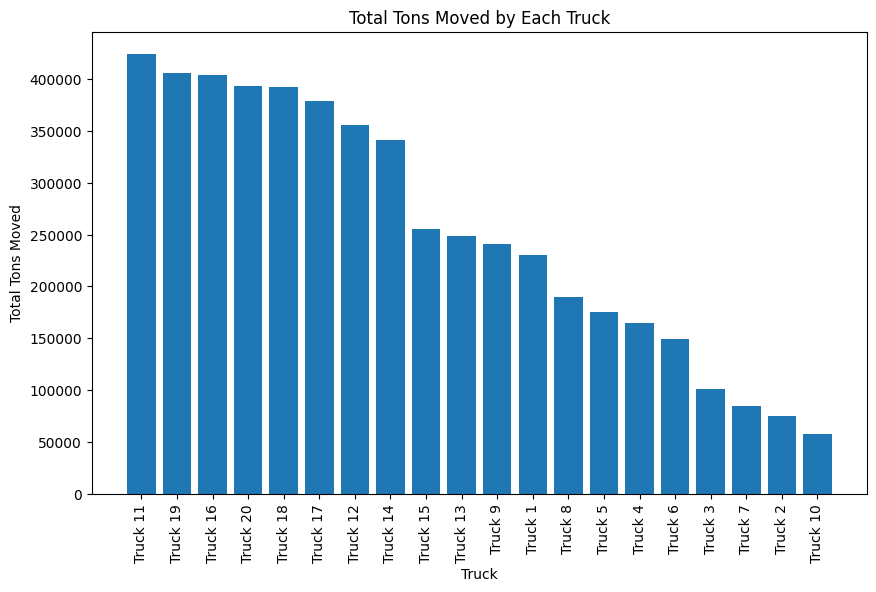

Total Tons Moved by Each Truck:
   MACH_SER_NO  PAYLD_WT
10    Truck 11  424301.2
18    Truck 19  405962.9
15    Truck 16  403566.2
19    Truck 20  393770.4
17    Truck 18  392733.1
16    Truck 17  378664.7
11    Truck 12  356100.0
13    Truck 14  341020.2
14    Truck 15  255738.1
12    Truck 13  248355.3
8      Truck 9  240837.4
0      Truck 1  230435.9
7      Truck 8  189969.1
4      Truck 5  175292.3
3      Truck 4  165134.7
5      Truck 6  149718.7
2      Truck 3  101153.2
6      Truck 7   84593.8
1      Truck 2   75444.6
9     Truck 10   57807.9
Combined total for all trucks is  5070599.699999999 tons


In [9]:
# Calculate total tons moved by each truck
total_tons_per_truck = df.groupby('MACH_SER_NO')['PAYLD_WT'].sum().reset_index()

# Sort the DataFrame in descending order based on total tons moved
total_tons_per_truck.sort_values(by='PAYLD_WT', ascending=False, inplace=True)

# Calculate combined total for all trucks
total_tons_combined = df['PAYLD_WT'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(total_tons_per_truck['MACH_SER_NO'], total_tons_per_truck['PAYLD_WT'])
plt.xlabel('Truck')
plt.ylabel('Total Tons Moved')
plt.title('Total Tons Moved by Each Truck')
plt.xticks(rotation=90)
plt.show()

# Display total tons moved by each truck
print("Total Tons Moved by Each Truck:")
print(total_tons_per_truck)

# Display combined total for all trucks
print("Combined total for all trucks is ", total_tons_combined, 'tons')


### 2.	Average Tones moved per truck.

In [10]:
# Calculate average tons moved per truck

number_of_trucks = 20
average_tons_per_truck = total_tons_combined / number_of_trucks

print('Average Tones moved per truck : ',average_tons_per_truck)

Average Tones moved per truck :  253529.98499999996


### 3.	Tones per Gallon per distance travelled matrix for each truck and all trucks.

In [11]:
df['TOTAL_DISTNC'] = df['EMTY_TRAV_DSTNC'] + df['LD_TRAV_DSTNC']

In [12]:
# Convert 'FUEL_USED_IN_CYC' from liters to gallons
df['FUEL_USED_IN_CYC'] = df['FUEL_USED_IN_CYC'] * 0.264172

# Calculate 'Tons per Gallon' for each truck
df['Tons_per_Gallon'] = df['PAYLD_WT'] / df['FUEL_USED_IN_CYC']

# Calculate 'Tons per Gallon per distance travelled' for each truck
df['Tons_per_Gallon_per_Distance'] = df['Tons_per_Gallon'] / df['Total_distance']

# Group by 'MACH_SER_NO' and calculate the average 'Tons per Gallon per distance travelled' for each truck
avg_tons_per_gallon_per_distance = df.groupby('MACH_SER_NO')['Tons_per_Gallon_per_Distance'].mean()

# Calculate the overall average 'Tons per Gallon per distance travelled' for all trucks
overall_avg_tons_per_gallon_per_distance = df['Tons_per_Gallon_per_Distance'].mean()

# Print the 'Tons per Gallon per distance travelled' matrix for each truck
print("Tons per Gallon per Distance Travelled (by Truck):")
print(avg_tons_per_gallon_per_distance)

# Print the overall average 'Tons per Gallon per distance travelled'
print("\nOverall Average Tons per Gallon per Distance Travelled (All Trucks):")
print(overall_avg_tons_per_gallon_per_distance)



Tons per Gallon per Distance Travelled (by Truck):
MACH_SER_NO
Truck 1          NaN
Truck 2     1.671145
Truck 3     1.829662
Truck 4     1.884673
Truck 5     2.471627
Truck 6     1.699713
Truck 7     2.157660
Truck 8          NaN
Truck 9     1.694958
Truck 10    1.472296
Truck 11    3.286893
Truck 12    2.325736
Truck 13    2.692437
Truck 14    2.196140
Truck 15    3.694523
Truck 16    2.635061
Truck 17    3.007564
Truck 18    2.060943
Truck 19    4.979170
Truck 20    2.693867
Name: Tons_per_Gallon_per_Distance, dtype: float64

Overall Average Tons per Gallon per Distance Travelled (All Trucks):
inf


### 4.	Which truck is running most efficient and which truck is running most inefficient as per as the matrix in item number 3?

In [13]:
print('Truck 19 is running most efficiently because it has the highest ratio of Tons per Gallon per Distance Travelled')
print('Truck 10 is running most inefficiently because it has the lowest ratio of Tons per Gallon per Distance Travelled')

Truck 19 is running most efficiently because it has the highest ratio of Tons per Gallon per Distance Travelled
Truck 10 is running most inefficiently because it has the lowest ratio of Tons per Gallon per Distance Travelled


### 5.	Show Visually which truck has travelled empty most distance.

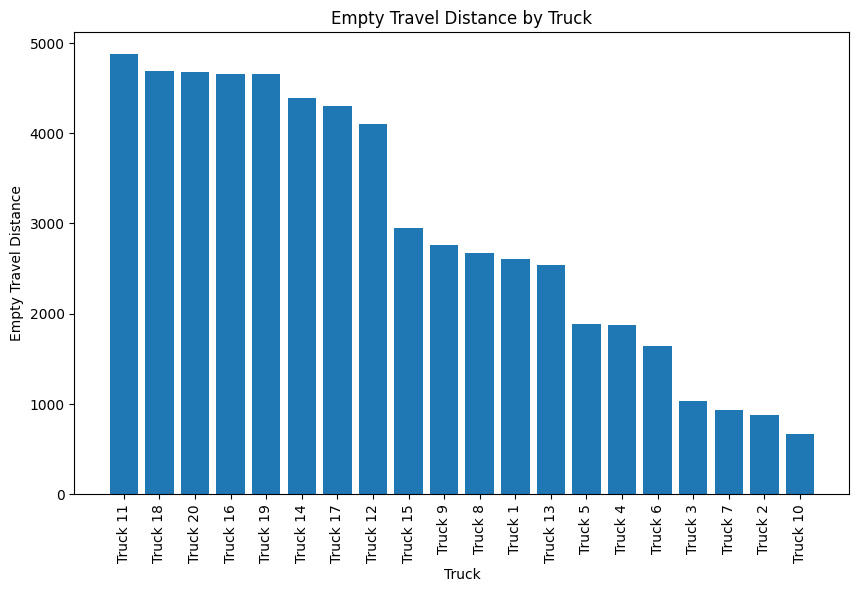

In [14]:
# Group the DataFrame by truck and calculate the sum of empty travel distance for each truck
empty_travel_distance_per_truck = df.groupby('MACH_SER_NO')['EMTY_TRAV_DSTNC'].sum()

# Sort the DataFrame in descending order based on empty travel distance
empty_travel_distance_per_truck_sorted = empty_travel_distance_per_truck.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(empty_travel_distance_per_truck_sorted.index, empty_travel_distance_per_truck_sorted.values)
plt.xlabel('Truck')
plt.ylabel('Empty Travel Distance')
plt.title('Empty Travel Distance by Truck')
plt.xticks(rotation=90)
plt.show()

In [15]:
# Find the truck with the most empty travel distance
truck_with_most_empty_travel_distance = empty_travel_distance_per_truck.idxmax()
most_empty_travel_distance = empty_travel_distance_per_truck.max()

# Print the truck with the most empty travel distance
print("Truck with the most empty travel distance:", truck_with_most_empty_travel_distance)
print("Empty travel distance for the truck:", most_empty_travel_distance, 'Km')


Truck with the most empty travel distance: Truck 11
Empty travel distance for the truck: 4879.7 Km


### 6.	Show visually which truck has Max and Min Gear Shifts per Mile

In [16]:
# Convert Total travelled distance from Kms to Miles
df['TOTAL_TRAV_DISTNC_MILE'] = df['Total_distance'] / 1.60934

# Calculate gear shifts per mile for each truck
df['Gear_Shifts_Per_Mile'] = df['SHFT_CT'] / df['TOTAL_TRAV_DISTNC_MILE']

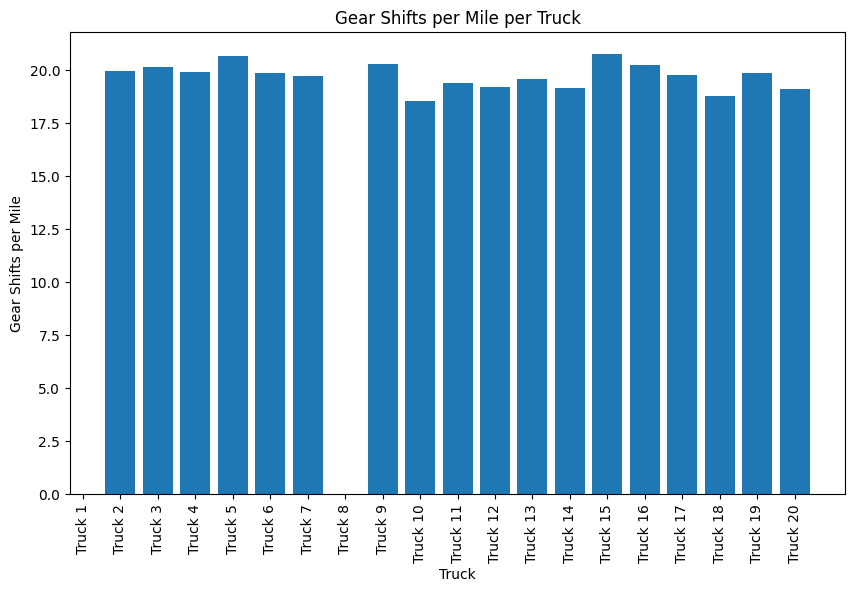

Truck with the maximum gear shifts per mile: Truck 15
Maximum gear shifts per mile: 20.742284113619768
Truck with the minimum gear shifts per mile: Truck 10
Minimum gear shifts per mile: 18.523742842612787


In [17]:
# Group the DataFrame by truck and calculate the mean gear shifts per mile for each truck
gear_shifts_per_mile_per_truck = df.groupby('MACH_SER_NO')['Gear_Shifts_Per_Mile'].mean()

# Get the truck with the maximum gear shifts per mile
max_gear_shifts_truck = gear_shifts_per_mile_per_truck.idxmax()
max_gear_shifts = gear_shifts_per_mile_per_truck.max()

# Get the truck with the minimum gear shifts per mile
min_gear_shifts_truck = gear_shifts_per_mile_per_truck.idxmin()
min_gear_shifts = gear_shifts_per_mile_per_truck.min()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(gear_shifts_per_mile_per_truck.index, gear_shifts_per_mile_per_truck.values)
plt.xlabel('Truck')
plt.ylabel('Gear Shifts per Mile')
plt.title('Gear Shifts per Mile per Truck')
plt.xticks(rotation=90)
plt.show()

print("Truck with the maximum gear shifts per mile:", max_gear_shifts_truck)
print("Maximum gear shifts per mile:", max_gear_shifts)
print("Truck with the minimum gear shifts per mile:", min_gear_shifts_truck)
print("Minimum gear shifts per mile:", min_gear_shifts)


### 7.	Which truck has max stop time in empty

In [18]:
# Group the DataFrame by 'MACH_SER_NO' and calculate the maximum stop time in empty state for each truck
max_empty_stop_time_per_truck = df.groupby('MACH_SER_NO')['EMTY_STOP_TM'].max()

# Find the truck with the maximum stop time in empty state
truck_with_max_empty_stop_time = max_empty_stop_time_per_truck.idxmax()
max_empty_stop_time = max_empty_stop_time_per_truck.max()

# Print the truck with the maximum stop time in empty state
print("Truck with maximum stop time in empty state:", truck_with_max_empty_stop_time)
print("Maximum stop time in empty state is ", max_empty_stop_time, 'seconds')

Truck with maximum stop time in empty state: Truck 16
Maximum stop time in empty state is  12149 seconds


### 8.	Total distance travelled by each truck as well as all trucks combined.

In [19]:
# Calculate total distance travelled by each truck
total_distance_per_truck = df.groupby('MACH_SER_NO')['TOTAL_DISTNC'].sum()

# Calculate combined total distance for all trucks
total_distance_combined = df['TOTAL_DISTNC'].sum()

# Print total distance travelled by each truck
print("Total distance travelled by each truck (in KM):")
print(total_distance_per_truck)

# Print combined total distance for all trucks
print("Combined total distance for all trucks (in KM):", total_distance_combined)


Total distance travelled by each truck (in KM):
MACH_SER_NO
Truck 1      5395.9
Truck 2      1807.6
Truck 3      2173.6
Truck 4      3826.2
Truck 5      3896.4
Truck 6      3416.8
Truck 7      1971.0
Truck 8      5598.4
Truck 9      5637.0
Truck 10     1338.9
Truck 11    10132.3
Truck 12     8573.7
Truck 13     5228.9
Truck 14     9131.5
Truck 15     6151.8
Truck 16     9723.2
Truck 17     8981.9
Truck 18     9831.9
Truck 19     9700.8
Truck 20     9701.3
Name: TOTAL_DISTNC, dtype: float64
Combined total distance for all trucks (in KM): 122219.09999999999


### 9.	Predict the future production capacity for each truck (Prediction & forecasting needs to be made for next 15 days)

In [20]:
df.head()

,MACH_SER_NO,OCUR_TS Date,OCUR_TS Time,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,...,FUEL_USED_IN_CYC,SHFT_CT,Total_distance,Miles,Gear_shift_Miles,TOTAL_DISTNC,Tons_per_Gallon,Tons_per_Gallon_per_Distance,TOTAL_TRAV_DISTNC_MILE,Gear_Shifts_Per_Mile
0,Truck 1,22-Jul-16,05.44.52.000000000 AM,349.7,193,454,711,3.6,648,610,...,20.499996,79,6.4,3.976774,19.865346,6.4,17.058540,2.665397,3.976786,19.865291
1,Truck 1,22-Jul-16,06.30.20.000000000 AM,336.5,323,99,177,0.6,56,1225,...,46.999991,73,7.4,4.598145,15.875966,7.4,7.159576,0.967510,4.598158,15.875922
2,Truck 1,22-Jul-16,07.02.59.000000000 AM,356.3,321,864,867,5.7,61,857,...,36.499993,100,10.3,6.400121,15.624704,10.3,9.761646,0.947733,6.400139,15.624660
3,Truck 1,22-Jul-16,07.54.33.000000000 AM,343.1,361,594,667,4.6,63,871,...,36.999993,99,9.2,5.716613,17.317946,9.2,9.272975,1.007932,5.716629,17.317898
4,Truck 1,22-Jul-16,08.38.55.000000000 AM,379.3,218,689,894,6.4,3725,1130,...,57.874989,103,10.8,6.710807,15.348378,10.8,6.553781,0.606832,6.710826,15.348335


In [21]:
df.drop(['OCUR_TS Time'],axis=1,inplace=True)

In [22]:
# Convert 'OCUR_TS Date' column to datetime
df['OCUR_TS Date'] = pd.to_datetime(df['OCUR_TS Date'], format='%d-%b-%y')

# Group the data by truck number and date while summing up the other columns
grouped_df = df.groupby(['MACH_SER_NO', 'OCUR_TS Date']).sum().reset_index()

In [23]:
grouped_df.head()

,MACH_SER_NO,OCUR_TS Date,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,LD_TRAV_DSTNC,...,FUEL_USED_IN_CYC,SHFT_CT,Total_distance,Miles,Gear_shift_Miles,TOTAL_DISTNC,Tons_per_Gallon,Tons_per_Gallon_per_Distance,TOTAL_TRAV_DISTNC_MILE,Gear_Shifts_Per_Mile
0,Truck 1,2016-07-22,3493.3,2677,4466,5628,33.6,5921,7640,36.0,...,333.624937,805,69.6,43.247422,199.528626,69.6,121.676901,22.673530,43.247542,199.528069
1,Truck 1,2016-07-23,4367.6,2772,2564,7046,45.7,7591,10999,51.1,...,463.999912,1103,96.8,60.148713,226.014216,96.8,122.185123,17.455312,60.148881,226.013584
2,Truck 1,2016-07-24,5170.9,2714,11631,11581,68.1,6463,14007,62.0,...,628.624881,1225,130.1,80.840367,225.970359,130.1,132.230943,17.793622,80.840593,225.969727
3,Truck 1,2016-07-25,5631.6,2820,5182,9568,53.1,9831,14546,63.9,...,631.249881,1389,117.0,72.700407,314.661530,117.0,154.393358,24.954185,72.700610,314.660651
4,Truck 1,2016-07-26,8104.7,4305,13965,14522,89.7,14167,21373,99.1,...,949.249820,2107,188.8,117.314845,465.416502,188.8,233.886672,40.301949,117.315173,465.415201


In [24]:
grouped_df.drop(['Miles', 'Gear_shift_Miles', 'TOTAL_DISTNC', 'Tons_per_Gallon', 'Tons_per_Gallon_per_Distance', 'TOTAL_TRAV_DISTNC_MILE', 'Gear_Shifts_Per_Mile'], axis='columns', inplace=True)

In [25]:
grouped_df.head()

,MACH_SER_NO,OCUR_TS Date,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,LD_TRAV_DSTNC,LD_PASS_CT,FUEL_USED_IN_CYC,SHFT_CT,Total_distance
0,Truck 1,2016-07-22,3493.3,2677,4466,5628,33.6,5921,7640,36.0,46,333.624937,805,69.6
1,Truck 1,2016-07-23,4367.6,2772,2564,7046,45.7,7591,10999,51.1,55,463.999912,1103,96.8
2,Truck 1,2016-07-24,5170.9,2714,11631,11581,68.1,6463,14007,62.0,62,628.624881,1225,130.1
3,Truck 1,2016-07-25,5631.6,2820,5182,9568,53.1,9831,14546,63.9,65,631.249881,1389,117.0
4,Truck 1,2016-07-26,8104.7,4305,13965,14522,89.7,14167,21373,99.1,101,949.249820,2107,188.8


In [26]:
grouped_df['Production_Capacity'] = (grouped_df['PAYLD_WT']+grouped_df['LD_PASS_CT']) / (grouped_df['LD_TM']+grouped_df['EMTY_STOP_TM']+grouped_df['EMTY_TRAV_TM']+grouped_df['LD_STOP_TM']+grouped_df['LD_TRAV_TM']+grouped_df['Total_distance'])

In [27]:
final_df = grouped_df[['MACH_SER_NO','OCUR_TS Date','Production_Capacity']]

In [28]:
final_df.head()

,MACH_SER_NO,OCUR_TS Date,Production_Capacity
0,Truck 1,2016-07-22,0.134056
1,Truck 1,2016-07-23,0.142349
2,Truck 1,2016-07-24,0.112472
3,Truck 1,2016-07-25,0.135427
4,Truck 1,2016-07-26,0.119755


In [29]:
final_df.isna().sum()

MACH_SER_NO              0
OCUR_TS Date             0
Production_Capacity    127
dtype: int64

In [30]:
# Fill NaN values with the mean of the target variable
final_df['Production_Capacity'].fillna(0, inplace=True)

<ipython-input-30-2ce06c42d261>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Production_Capacity'].fillna(0, inplace=True)


In [31]:
final_df.set_index('OCUR_TS Date', inplace=True)

In [32]:
final_df.head()

,MACH_SER_NO,Production_Capacity
OCUR_TS Date,,
2016-07-22,Truck 1,0.134056
2016-07-23,Truck 1,0.142349
2016-07-24,Truck 1,0.112472
2016-07-25,Truck 1,0.135427
2016-07-26,Truck 1,0.119755


In [33]:
truck_data = {}
for truck, group in final_df.groupby('MACH_SER_NO'):
    truck_data[truck] = group['Production_Capacity']

In [34]:
from statsmodels.tsa.arima.model import ARIMA

def forecast_production_capacity(truck_data):
    # Fit ARIMA model
    model = ARIMA(truck_data, order=(1, 0, 0))
    model_fit = model.fit()

    # Forecast next 15 days
    forecast = model_fit.forecast(steps=15)

    return forecast

In [35]:
forecasts = {}
for truck, truck_series in truck_data.items():
    forecasts[truck] = forecast_production_capacity(truck_series)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

In [45]:
for truck, forecast in forecasts.items():
    print(f"Truck: {truck}")
    print(f"Forecasted Production Capacity for the next 15 days: \n{forecast}")
    print()

Truck: Truck 1
Forecasted Production Capacity for the next 15 days: 
2016-08-23    0.061791
2016-08-24    0.092067
2016-08-25    0.106902
2016-08-26    0.114171
2016-08-27    0.117732
2016-08-28    0.119477
2016-08-29    0.120332
2016-08-30    0.120751
2016-08-31    0.120956
2016-09-01    0.121057
2016-09-02    0.121106
2016-09-03    0.121130
2016-09-04    0.121142
2016-09-05    0.121148
2016-09-06    0.121151
Freq: D, Name: predicted_mean, dtype: float64

Truck: Truck 2
Forecasted Production Capacity for the next 15 days: 
2016-08-23    0.026457
2016-08-24    0.041066
2016-08-25    0.049133
2016-08-26    0.053587
2016-08-27    0.056046
2016-08-28    0.057404
2016-08-29    0.058154
2016-08-30    0.058568
2016-08-31    0.058797
2016-09-01    0.058923
2016-09-02    0.058993
2016-09-03    0.059031
2016-09-04    0.059052
2016-09-05    0.059064
2016-09-06    0.059071
Freq: D, Name: predicted_mean, dtype: float64

Truck: Truck 3
Forecasted Production Capacity for the next 15 days: 
2016-08-2

### 10.	Identify truck which has lowest and highest production prediction.




In [37]:
sums = {}

for truck, forecast in forecasts.items():
    total_capacity = sum(forecast)
    sums[truck] = total_capacity


In [38]:
for truck, total_capacity in sums.items():
    print(f"Truck: {truck}")
    print(f"Sum of Predicted Production Capacity for the next 15 days: {total_capacity}")
    print()

Truck: Truck 1
Sum of Predicted Production Capacity for the next 15 days: 1.7009149919380504

Truck: Truck 2
Sum of Predicted Production Capacity for the next 15 days: 0.8133474190040246

Truck: Truck 3
Sum of Predicted Production Capacity for the next 15 days: 0.8280043782604575

Truck: Truck 4
Sum of Predicted Production Capacity for the next 15 days: 1.6330188409413489

Truck: Truck 5
Sum of Predicted Production Capacity for the next 15 days: 1.7027960376644402

Truck: Truck 6
Sum of Predicted Production Capacity for the next 15 days: 1.0001484127476323

Truck: Truck 7
Sum of Predicted Production Capacity for the next 15 days: 0.9078865305504608

Truck: Truck 8
Sum of Predicted Production Capacity for the next 15 days: 1.2794696753365755

Truck: Truck 9
Sum of Predicted Production Capacity for the next 15 days: 1.0121165077258711

Truck: Truck 10
Sum of Predicted Production Capacity for the next 15 days: 0.42967012677426203

Truck: Truck 11
Sum of Predicted Production Capacity for t

Truck 11 has the highest Production preditions
Truck 10 has the lowest Prodiction predictions

### 11.	Recommendation settings for each parameter to reduce fuel consumption.

In [39]:
# Reduce Loaded stop time, empty stop time, loading time by turning off engine.
# Avoid changing gear to much. Reduce Shift count
# Apply load optimization techniques to reduce fuel consumptions

### 12.	Sky is the limit here – show something creative from this data set using your valuable skills.

Fuel Consumption Analysis

In [40]:
# Calculate average fuel consumption per truck
avg_fuel_consumption = df.groupby("MACH_SER_NO")["FUEL_USED_IN_CYC"].mean()

# Identify trucks with high and low fuel efficiency
high_efficiency_trucks = avg_fuel_consumption[avg_fuel_consumption < avg_fuel_consumption.mean()]
low_efficiency_trucks = avg_fuel_consumption[avg_fuel_consumption > avg_fuel_consumption.mean()]

# Print the results
print("Trucks with High Fuel Efficiency:")
print(high_efficiency_trucks)
print("\nTrucks with Low Fuel Efficiency:")
print(low_efficiency_trucks)


Trucks with High Fuel Efficiency:
MACH_SER_NO
Truck 11    28.315028
Truck 12    29.343219
Truck 13    26.490232
Truck 14    29.207602
Truck 15    29.191369
Truck 16    29.930417
Truck 17    28.448477
Truck 18    29.716913
Truck 19    28.990453
Truck 20    29.649574
Name: FUEL_USED_IN_CYC, dtype: float64

Trucks with Low Fuel Efficiency:
MACH_SER_NO
Truck 1     39.012309
Truck 2     38.535381
Truck 3     37.740065
Truck 4     36.312620
Truck 5     36.066877
Truck 6     38.011065
Truck 7     34.376970
Truck 8     37.052475
Truck 9     36.991272
Truck 10    37.953981
Name: FUEL_USED_IN_CYC, dtype: float64


Travel Time and Distance

In [43]:
# Calculate average trip duration and distance per truck
avg_trip_duration = df.groupby("MACH_SER_NO")["LD_TRAV_TM"].mean()
avg_distance = df.groupby("MACH_SER_NO")["Total_distance"].mean()

# Identify trucks with longer travel times and more distance covered
trucks_with_longer_travel_times = avg_trip_duration[avg_trip_duration > avg_trip_duration.mean()]
trucks_with_more_distance = avg_distance[avg_distance > avg_distance.mean()]

# Print the results
print("Trucks with Longer Travel Times:")
print(trucks_with_longer_travel_times)

print("\nTrucks with More Distance Covered:")
print(trucks_with_more_distance)


Trucks with Longer Travel Times:
MACH_SER_NO
Truck 1     879.598529
Truck 2     893.575342
Truck 3     875.025271
Truck 4     831.631365
Truck 5     889.172345
Truck 6     868.543124
Truck 7     824.146245
Truck 8     851.382979
Truck 9     844.539244
Truck 10    857.355828
Name: LD_TRAV_TM, dtype: float64

Trucks with More Distance Covered:
MACH_SER_NO
Truck 2     8.253881
Truck 9     8.193314
Truck 10    8.214110
Truck 11    8.380728
Truck 12    8.480415
Truck 14    8.369844
Truck 15    8.290836
Truck 16    8.469686
Truck 17    8.263017
Truck 18    8.731705
Truck 19    8.319726
Truck 20    8.592826
Name: Total_distance, dtype: float64


Payload Weight Analysis

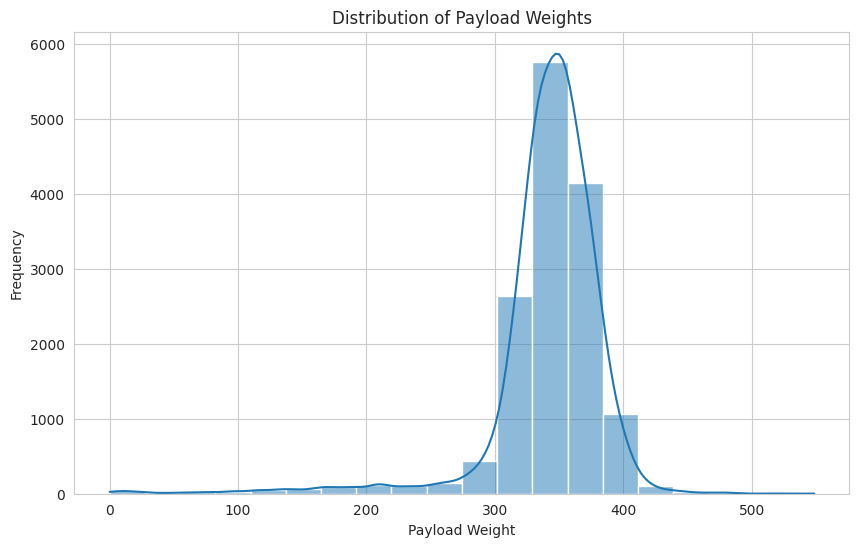

Trucks with Consistently Heavier Loads:
MACH_SER_NO
Truck 3     365.174007
Truck 10    354.649693
Truck 12    352.225519
Truck 16    351.538502
Truck 5     351.287174
Name: PAYLD_WT, dtype: float64

Trucks with Consistently Lighter Loads:
MACH_SER_NO
Truck 8     269.459716
Truck 14    312.575802
Truck 7     334.362846
Truck 4     336.323218
Truck 1     338.876324
Name: PAYLD_WT, dtype: float64


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of payload weights
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="PAYLD_WT", bins=20, kde=True)
plt.xlabel("Payload Weight")
plt.ylabel("Frequency")
plt.title("Distribution of Payload Weights")
plt.show()

# Identify trucks with consistently heavier or lighter loads
heavy_load_trucks = df.groupby("MACH_SER_NO")["PAYLD_WT"].mean().nlargest(5)
light_load_trucks = df.groupby("MACH_SER_NO")["PAYLD_WT"].mean().nsmallest(5)

# Print the trucks with consistently heavier loads
print("Trucks with Consistently Heavier Loads:")
print(heavy_load_trucks)

# Print the trucks with consistently lighter loads
print("\nTrucks with Consistently Lighter Loads:")
print(light_load_trucks)


Fuel Consumption Analysis Day Wise


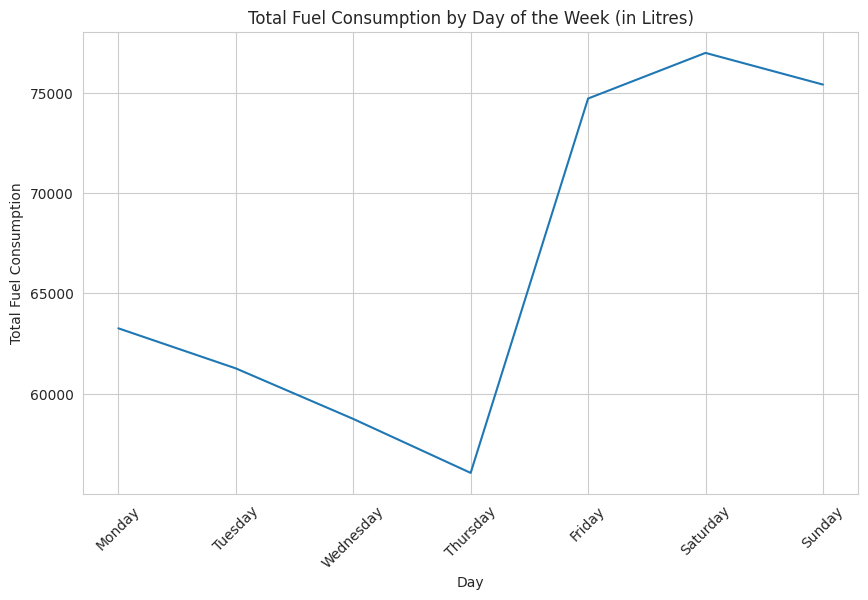

In [59]:
import seaborn as sns

# Convert 'OCUR_TS Date' column to datetime format
df['OCUR_TS Date'] = pd.to_datetime(df['OCUR_TS Date'])

# Extract the day of the week from 'OCUR_TS Date' and assign an order
df['DayOfWeek'] = df['OCUR_TS Date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate the total fuel consumption for each day of the week
total_fuel_consumption = df.groupby('DayOfWeek')['FUEL_USED_IN_CYC'].sum()

# Reindex the data to have the days in order
total_fuel_consumption_ordered = total_fuel_consumption.reindex(day_order)

# Plot the line graph
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.lineplot(x=day_order, y=total_fuel_consumption_ordered)
plt.xlabel('Day')
plt.ylabel('Total Fuel Consumption')
plt.title('Total Fuel Consumption by Day of the Week (in Litres)')
plt.xticks(rotation=45)
plt.show()